In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
Customers_df=pd.read_csv("Customers.csv")

In [3]:
Customers_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
Customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
Customers_df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [6]:
Customers_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
Customers_df.shape

(200, 5)

In [8]:
#weather_df.describe()
Customers_df.describe().transpose() #for more organization

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
Customers_df.describe(include=['O']).transpose()

,count,unique,top,freq
Genre,200,2,Female,112


In [10]:
c=Customers_df.corr()
c

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [11]:
if len(Customers_df[Customers_df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(weather_df[Customers_df.duplicated()]))
    print(Customers_df[Customers_df.duplicated(keep=False)].sort_values(by=list(Customers_df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


# visualization

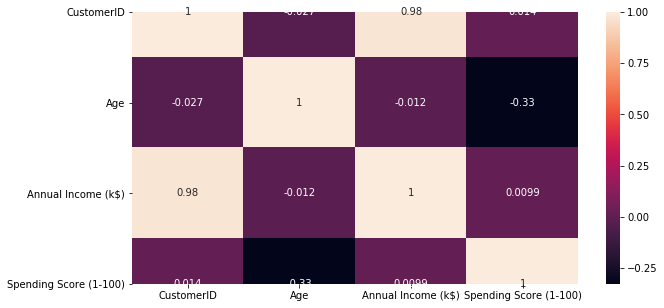

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(c, annot=True)

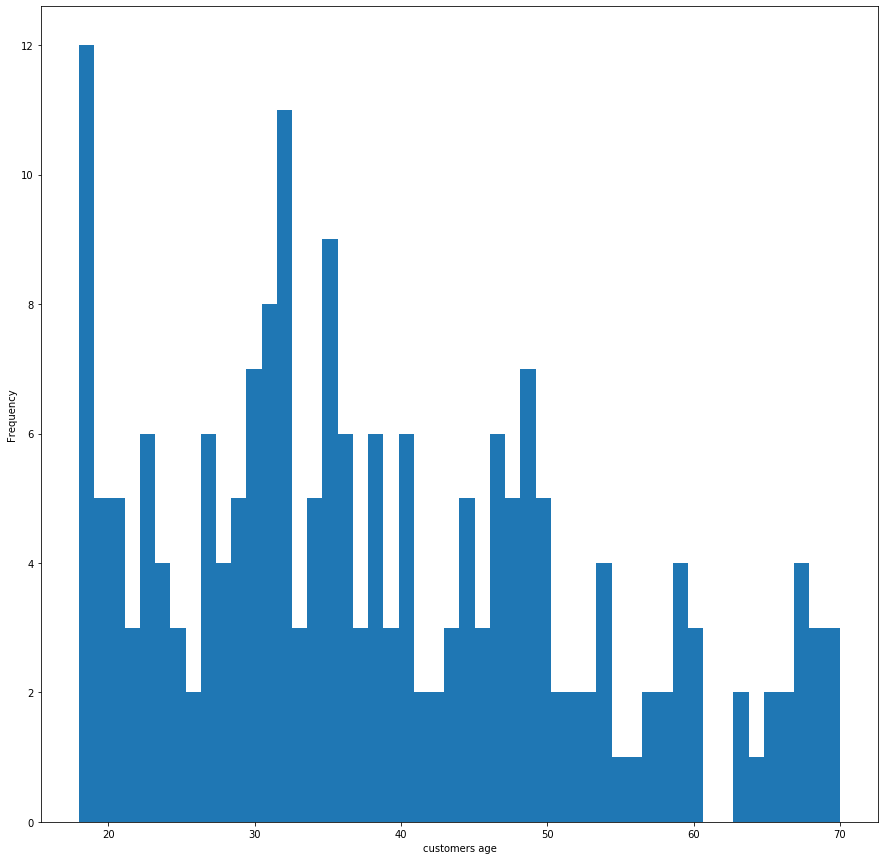

In [13]:
Customers_df.Age.plot(kind = 'hist',bins = 50,figsize = (15,15))
plt.xlabel('customers age')
plt.show()

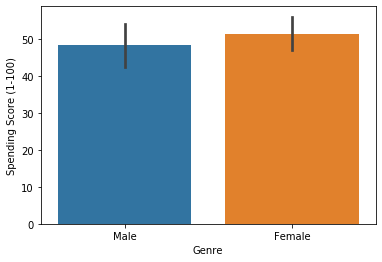

In [14]:
sns.barplot(x = "Genre", y = "Spending Score (1-100)", data = Customers_df)

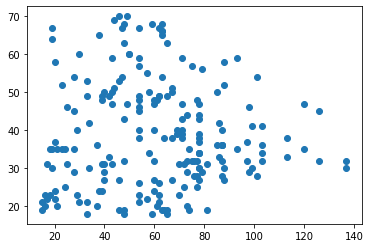

In [15]:

plt.scatter(x = "Annual Income (k$)", y = "Age", data = Customers_df)

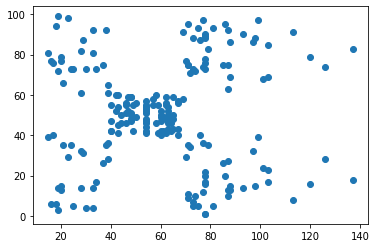

In [16]:
plt.scatter(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = Customers_df)

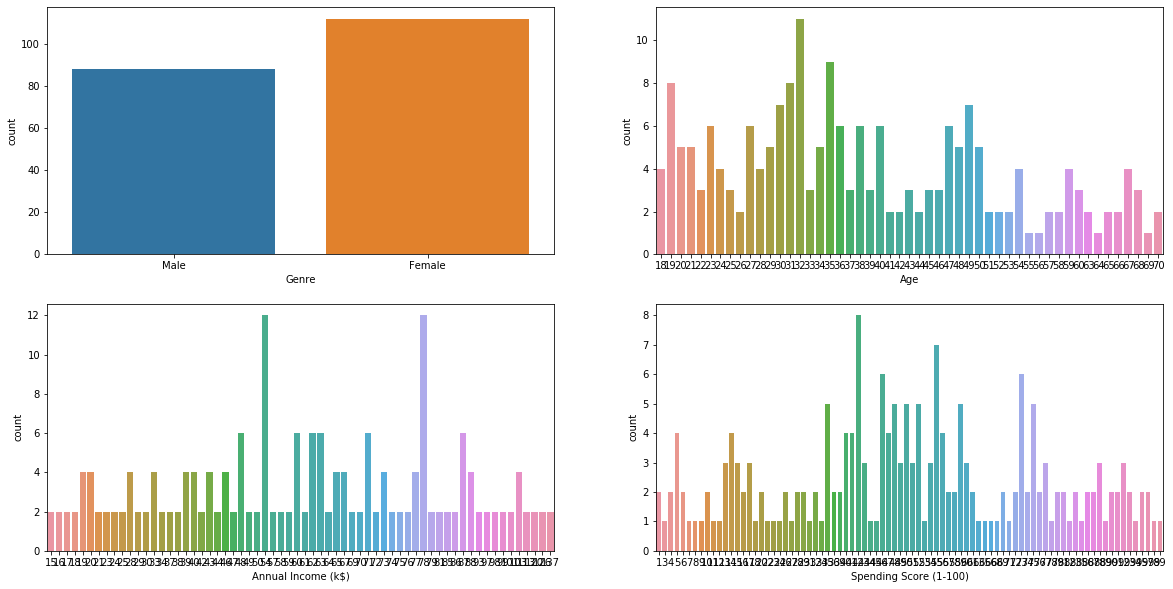

In [17]:

columns =  ['Genre', 'Age','Annual Income (k$)','Spending Score (1-100)']

#Distribution
fig = plt.figure(figsize=(20, 10))

for i in range (0,len(columns)):
    fig.add_subplot(2,2,i+1) #This to have a 2 X 2 plots table
    sns.countplot(x=columns[i], data=Customers_df)
    
plt.show();

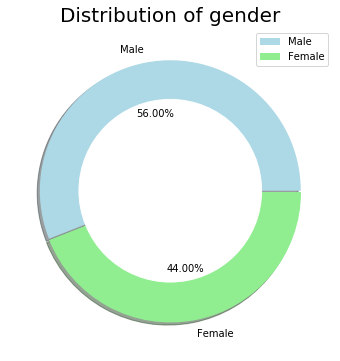

In [35]:
size = Customers_df['Genre'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

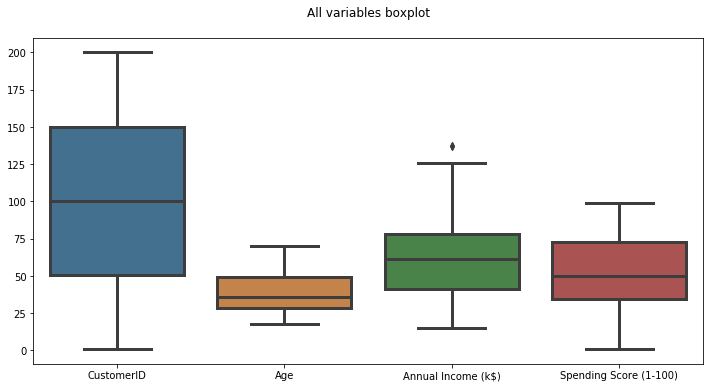

In [18]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=Customers_df, fliersize=5, linewidth=3, notch=False,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

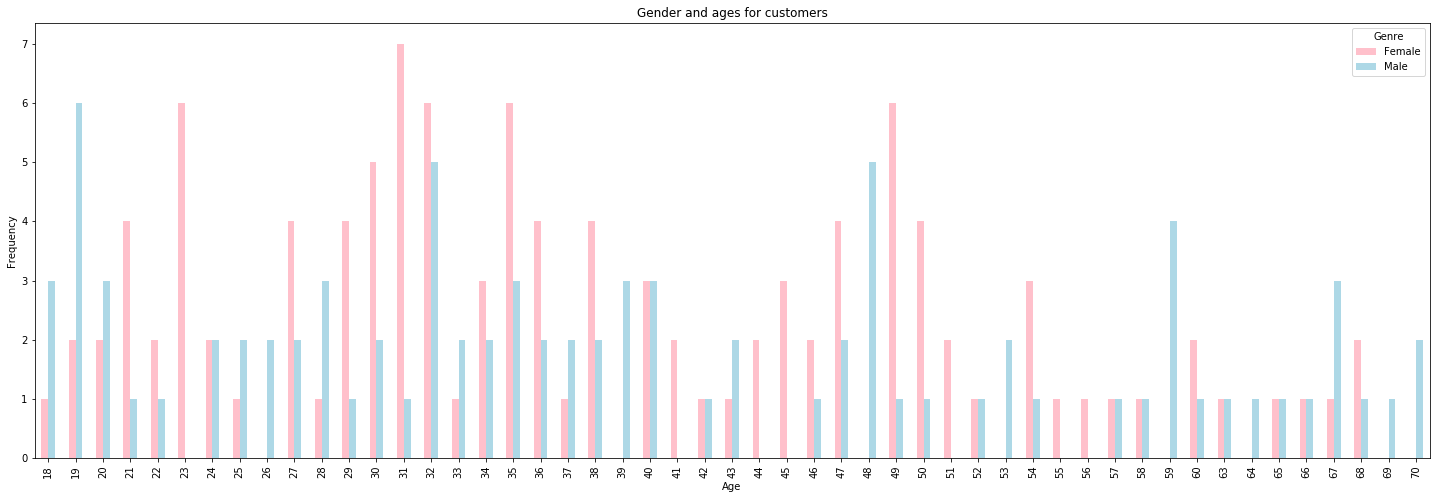

In [33]:
pd.crosstab(Customers_df.Age,Customers_df.Genre).plot(kind="bar",figsize=(25,8),color=['pink','lightblue' ])
plt.title('Gender and ages for customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Start clustering

In [83]:
newdf=Customers_df.drop(["CustomerID","Genre","Age"],axis=1)
newdf.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [84]:
#To give equal importance to all features, we need to scale them
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(newdf)
data_transformed = mms.transform(newdf)

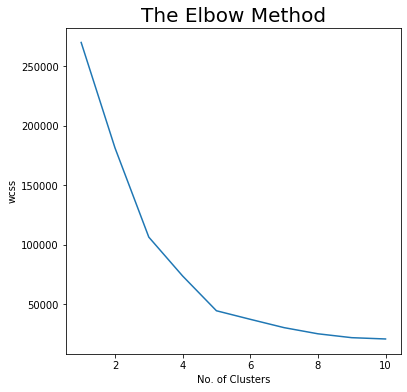

In [85]:
from sklearn.cluster import KMeans
X=newdf.values
y=Customers_df["Spending Score (1-100)"]
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [110]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [87]:
#from sklearn.metrics.cluster import homogeneity_score
#print("Clustring Accuracy using homogeneity score: {:.2%}".format(homogeneity_score(y, y_kmeans)))

In [88]:
#To give equal importance to all features, we need to scale them
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(newdf)
data_transformed = mms.transform(newdf)

In [89]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

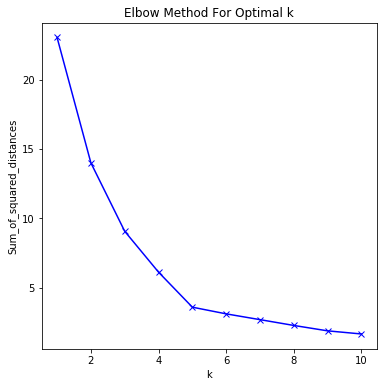

In [90]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

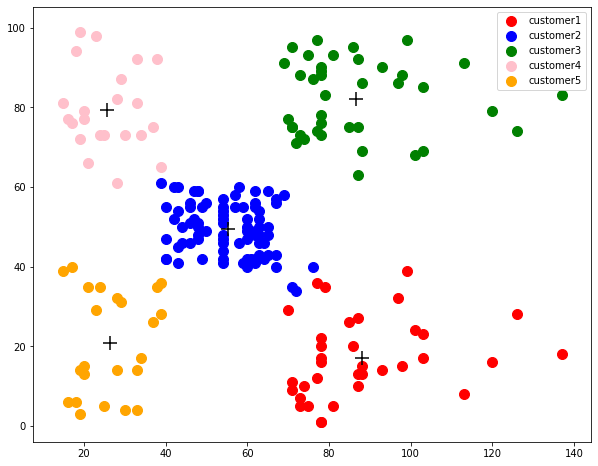

In [111]:
plt.figure(figsize=(10,8))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'customer1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'customer2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'customer3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'pink', label = 'customer4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'customer5')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, marker='+', c = 'black')

plt.legend()

### Evaluation

In [92]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.553931997444648


* The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point o is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.*

In [117]:
print("%.2f" % homogeneity_score(y, y_kmeans))

0.30


In [121]:
print("%.2f" % completeness_score(y, y_kmeans))

0.86


In [96]:
# Building the clustering model 
kmeans5 = KMeans(n_clusters = 5) 
  
# Training the clustering model 
kmeans5.fit(X) 
  
# Storing the predicted Clustering labels 
labels5 = kmeans5.predict(X) 
  
# Evaluating the performance 
v_scores.append(v_measure_score(y, labels5)) 

In [103]:
# Building the clustering model 
kmeans6 = KMeans(n_clusters = 6) 
  
# Training the clustering model 
kmeans6.fit(X) 
  
# Storing the predicted Clustering labels 
labels6 = kmeans6.predict(X) 
  
# Evaluating the performance 

v_scores.append(v_measure_score(y, labels6))


In [106]:
print("%.2f" % v_measure_score(y, labels4))
print("%.2f" % v_measure_score(y, labels5))
print("%.2f" % v_measure_score(y, labels6))

0.37
0.44
0.46


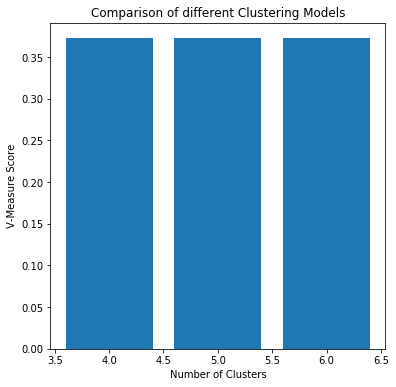

In [100]:
plt.bar(N_Clusters, v_scores) 
plt.xlabel('Number of Clusters') 
plt.ylabel('V-Measure Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 

Text(0.5, 1.0, 'Predicted')

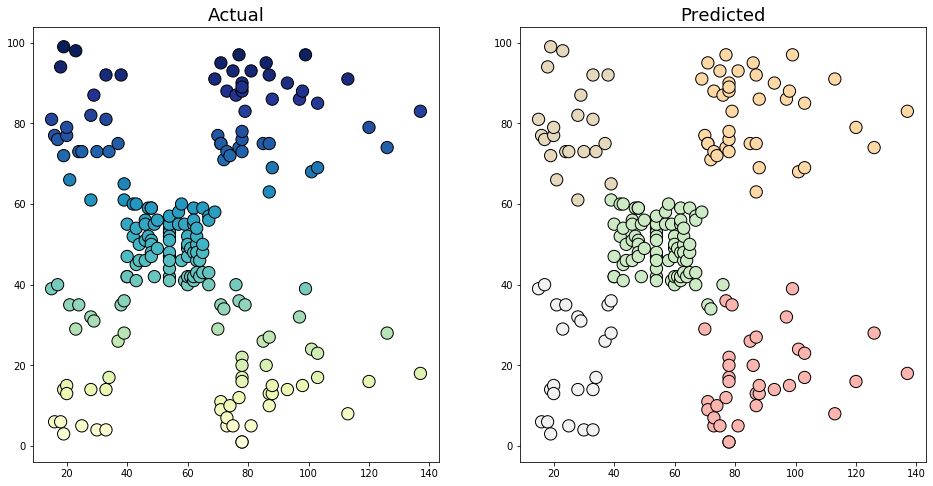

In [122]:
#this will tell us to which cluster does the data observations belong.
new_labels = kmeans.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='YlGnBu', edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='Pastel1', edgecolor='k', s=150)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)